---

<div align="center"><h1><font color='green'> COSC 2673/2793 | Machine Learning  </font></h1></div>
<div align="center"><h2><font color='green'> Assingment 2 </font></h2></div>
<div align="center"><h2><font color='green'> Wing Hang Chan S3939713 </font></h2></div>

---

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from keras.regularizers import L2, L1
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df_main = pd.read_csv('./Image_classification_data/data_labels_mainData.csv')
df_extra = pd.read_csv('./Image_classification_data/data_labels_extraData.csv')

# Classification
## Exploratory Data Analysis

In [3]:
df_main.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [4]:
df_main.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [5]:
df_extra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [6]:
df_extra.describe()

,InstanceID,patientID,isCancerous
count,10384.000000,10384.00000,10384.000000
mean,12087.866333,80.38203,0.287943
std,6173.866838,9.40388,0.452826
min,1631.000000,61.00000,0.000000
25%,6655.750000,71.00000,0.000000
50%,12377.500000,81.00000,0.000000
75%,16374.250000,88.00000,1.000000
max,22235.000000,99.00000,1.000000


[Text(0, 0, 'Fibroblast'),
 Text(1, 0, '\nInflammatory'),
 Text(2, 0, 'Epithelial'),
 Text(3, 0, '\nOthers')]

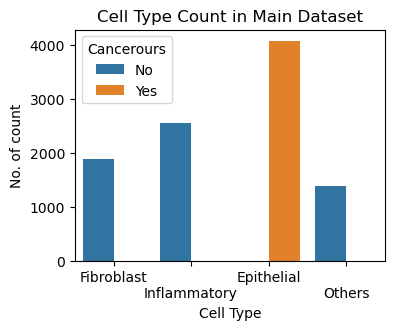

In [7]:
fig = plt.figure(figsize=(4,3))

sns.countplot(x='cellType', data=df_main, hue='isCancerous')

plt.title("Cell Type Count in Main Dataset")
plt.xlabel('Cell Type')
plt.ylabel('No. of count')
plt.legend(title='Cancerours', labels=['No', 'Yes'])
plt.xticks([0, 1, 2, 3])
plt.gca().set_xticklabels(['Fibroblast', '\nInflammatory', 'Epithelial', '\nOthers'])

In [8]:
df_main_2 = df_main.copy(True)
df_extra_2 = df_extra.copy(True)

df_main_2['Source'] = 'Main'
df_extra_2['Source'] = 'Extra'

df_all = pd.concat([df_main_2, df_extra_2])
df_all

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Source
0,22405,1,22405.png,fibroblast,0.0,0,Main
1,22406,1,22406.png,fibroblast,0.0,0,Main
2,22407,1,22407.png,fibroblast,0.0,0,Main
3,22408,1,22408.png,fibroblast,0.0,0,Main
4,22409,1,22409.png,fibroblast,0.0,0,Main
...,...,...,...,...,...,...,...
10379,20028,99,20028.png,NaN,NaN,0,Extra
10380,20029,99,20029.png,NaN,NaN,0,Extra
10381,20030,99,20030.png,NaN,NaN,0,Extra
10382,20031,99,20031.png,NaN,NaN,0,Extra


[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

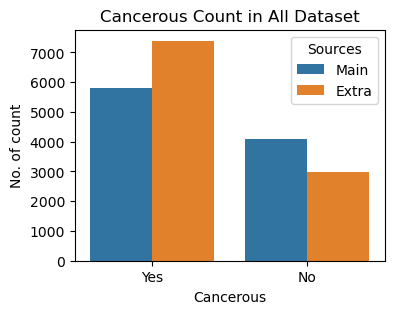

In [9]:
fig = plt.figure(figsize=(4,3))

sns.countplot(x='isCancerous', data=df_all, hue='Source')

plt.title("Cancerous Count in All Dataset")
plt.xlabel('Cancerous')
plt.ylabel('No. of count')
plt.legend(title='Sources')
plt.gca().set_xticklabels(['Yes','No'])

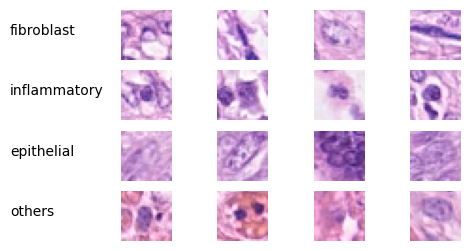

In [10]:
cell_types = [0, 1, 2, 3]
NO_OF_IMAGE_SHOW = 4
r_inx = np.random.choice(1000, NO_OF_IMAGE_SHOW)

fig, axs = plt.subplots(len(cell_types), NO_OF_IMAGE_SHOW + 1, figsize=(NO_OF_IMAGE_SHOW + 2, 3))
for i, cell_type in enumerate(cell_types):
    rand_image_name = df_main[df_main['cellType'] == cell_type].reset_index().loc[r_inx, 'ImageName']
    axs[i,0].text(0, 0.5, df_main[df_main['cellType'] == cell_type]['cellTypeName'].iloc[0])
    axs[i,0].axis('off')
    for j, image_path in enumerate(rand_image_name):
        im = np.asarray(Image.open('./Image_classification_data/patch_images/'+image_path))
        axs[i,j+1].imshow(im,cmap='gray')
        axs[i,j+1].axis('off')

plt.show()

In [11]:
df_main.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

## Data Preprocessing

In [12]:
df_main['isCancerous_str'] = df_main['isCancerous'].apply(lambda x: 'No' if x == 0 else 'Yes' )
df_main['ImageName'] = df_main['ImageName'].astype('str')
df_main['cellTypeName'] = df_main['cellTypeName'].astype('str')
df_main['isCancerous_str'] = df_main['isCancerous_str'].astype('str')

df_main.head()
df_main['isCancerous_str'].value_counts()

No     5817
Yes    4079
Name: isCancerous_str, dtype: int64

In [13]:
train_data, test_data = train_test_split(df_main, test_size=0.15, random_state=7)
train_data, val_data = train_test_split(train_data, test_size=0.175, random_state=7)

print(f'Train data : {train_data.shape[0]}, Val Data: {val_data.shape[0]}, Test Data: {test_data.shape[0]}')
df_main.dtypes
train_data['isCancerous_str'].value_counts()

Train data : 6939, Val Data: 1472, Test Data: 1485


No     4104
Yes    2835
Name: isCancerous_str, dtype: int64

# Cell Type Classification - Multi-class
## Baseline Model - Multi-class

In [14]:
# [1] Ref:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

BATCH_SIZE = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellTypeName",
        target_size=(27, 27),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        seed=7,
        shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellTypeName",
        target_size=(27, 27),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
)

Found 6939 validated image filenames belonging to 4 classes.
Found 1472 validated image filenames belonging to 4 classes.


In [16]:
cell_type_count = np.bincount(train_generator.classes)
total = np.sum(cell_type_count)
class_weight = {}
print(type(cell_type_count))
print(train_generator.class_indices)
for i, each_type_count in enumerate(cell_type_count):
    class_weight[i] = 1/each_type_count * total/len(cell_type_count)

print(f'Class Weight: {class_weight}')

<class 'numpy.ndarray'>
{'epithelial': 0, 'fibroblast': 1, 'inflammatory': 2, 'others': 3}
Class Weight: {0: 0.611904761904762, 1: 1.2708791208791208, 2: 0.9751264755480608, 3: 1.8070312499999999}


In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [18]:
LOG_DIR = 'logs'

### Model Architecture

In [19]:
model_1 = Sequential([

    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(27, 27, 3)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3)),

    Flatten(),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),

    Dense(4, activation='softmax'),
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         7

In [20]:
model_1.compile("adam", loss=tf.losses.CategoricalCrossentropy(), metrics=['categorical_accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

hist_1 = model_1.fit(
    train_generator, 
    epochs=100, 
    validation_data=validation_generator, 
    callbacks=[tensorboard_callback, early_stopping],
    class_weight=class_weight
)

Epoch 1/100


2023-05-17 11:24:34.130818: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


214/217 [============================>.] - ETA: 0s - loss: 1.3864 - categorical_accuracy: 0.2863

2023-05-17 11:24:36.244386: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


217/217 [==============================] - 2s 10ms/step - loss: 1.3861 - categorical_accuracy: 0.2838 - val_loss: 1.3876 - val_categorical_accuracy: 0.1440
Epoch 2/100
217/217 [==============================] - 2s 10ms/step - loss: 1.3710 - categorical_accuracy: 0.3281 - val_loss: 1.3761 - val_categorical_accuracy: 0.4266
Epoch 3/100
217/217 [==============================] - 2s 10ms/step - loss: 1.3857 - categorical_accuracy: 0.2255 - val_loss: 1.3894 - val_categorical_accuracy: 0.1739
Epoch 4/100
217/217 [==============================] - 2s 11ms/step - loss: 1.3557 - categorical_accuracy: 0.3287 - val_loss: 1.1680 - val_categorical_accuracy: 0.4905
Epoch 5/100
217/217 [==============================] - 3s 12ms/step - loss: 1.1770 - categorical_accuracy: 0.5086 - val_loss: 0.9354 - val_categorical_accuracy: 0.5781
Epoch 6/100
217/217 [==============================] - 3s 13ms/step - loss: 1.0630 - categorical_accuracy: 0.5976 - val_loss: 0.8062 - val_categorical_accuracy: 0.6739
Epoc

###  Training and Valuation result

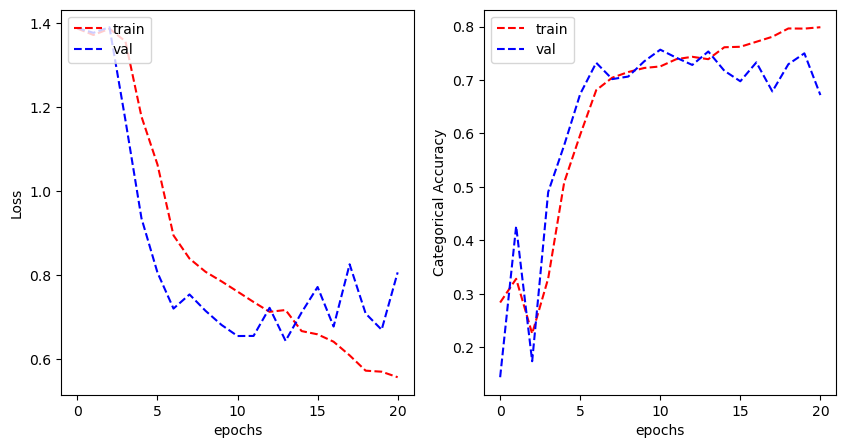

In [21]:
plot_learning_curve(
    hist_1.history['loss'],
    hist_1.history['val_loss'],
    hist_1.history['categorical_accuracy'],
    hist_1.history['val_categorical_accuracy'],
    metric_name='Categorical Accuracy'
)

In [22]:
# model_1.save('baseline')
# model_1 = keras.models.load_model("baseline")

### Test & Evaluate

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
TEST_BATCH_SIZE = 1
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellTypeName",
        target_size=(27, 27),
        batch_size=TEST_BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
)

Found 1485 validated image filenames belonging to 4 classes.


In [24]:
def plot_cm(test_gen, predictions, is_binary=False):
    cm = confusion_matrix(test_gen.classes, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
    disp.plot()
    plt.grid(False)
    plt.show()

    if is_binary == True:
        print(f'{"Non Cancerous Cell Detected (True Negatives):":<60}{cm[0][0]}')
        print(f'{"Non Cancerous Cell Incorrectly Detected (False Positives):":<60}{cm[0][1]}')
        print(f'{"Cancerous Cell Missed (False Negatives):":<60}{cm[1][0]}')
        print(f'{"Cancerous Cell Detected (True Positives):":<60}{cm[1][1]}')
    else:
        print(f'{"True Positives Count:":<60}{np.sum([cm[0][0], cm[1][1], cm[2][2], cm[3][3]])}')
    print(f'{"Total Cell Counts:":<60}{np.sum(cm)}')

In [25]:
def test_and_evaluate(model, test_gen, is_binary=False):
    results = model.evaluate(test_gen)
    test_pred_prob = model.predict(test_gen)
    if is_binary == True:
        test_pred = np.where(test_pred_prob > 0.5, 1, 0)
    else:
        test_pred = np.argmax(test_pred_prob, axis=1)
    for name, value in zip(model.metrics_names, results):
        print(f'{name} : {value}\n')
    plot_cm(test_gen, test_pred, is_binary)
    print(f'{"F1 Score (Weighted):":<60}{f1_score(test_gen.classes, test_pred, average="weighted")}')
    return (results, test_pred_prob)

 145/1485 [=>............................] - ETA: 1s - loss: 0.6580 - categorical_accuracy: 0.7517

2023-05-17 11:25:32.099933: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  97/1485 [>.............................] - ETA: 1s

2023-05-17 11:25:33.484999: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1485/1485 [==============================] - 1s 895us/step
loss : 0.6433002948760986

categorical_accuracy : 0.7373737096786499



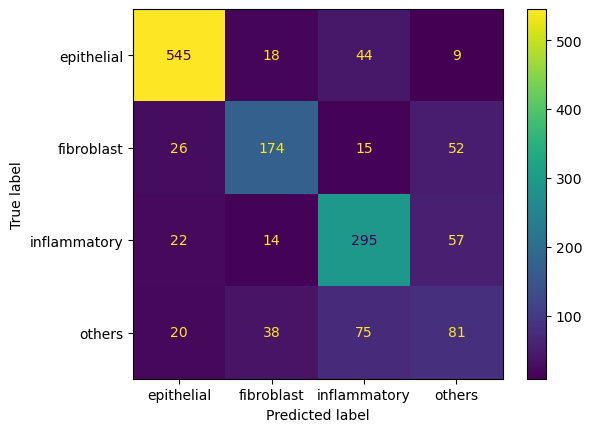

True Positives Count:                                       1095
Total Cell Counts:                                          1485
F1 Score (Weighted):                                        0.7355554070539585


([0.6433002948760986, 0.7373737096786499],
 array([[8.3431220e-01, 1.4282605e-01, 6.9907052e-03, 1.5871011e-02],
        [9.8419118e-01, 1.2635541e-02, 4.9407245e-04, 2.6791808e-03],
        [2.7137708e-03, 1.9414803e-02, 6.9636840e-01, 2.8150305e-01],
        ...,
        [1.7250689e-02, 2.4863605e-01, 2.8874025e-01, 4.4537297e-01],
        [1.3185815e-03, 1.3164186e-02, 7.1016139e-01, 2.7535585e-01],
        [5.9357350e-04, 5.5405837e-01, 1.4279572e-02, 4.3106851e-01]],
       dtype=float32))

In [26]:
test_and_evaluate(model_1, test_generator)

----

## Additional Model

### Oversampling

ref: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversampling

In [27]:
largest_no = 50000

e_features = train_data[train_data['cellTypeName'] == 'epithelial']['ImageName'].to_numpy()
e_labels = train_data[train_data['cellTypeName'] == 'epithelial']['cellTypeName'].to_numpy()
e_ids = np.arange(len(e_features))
e_choices = np.random.choice(e_ids, largest_no)
e_pick_feature = e_features[e_choices]
e_choices_labels = np.random.choice(e_labels, largest_no)


f_features = train_data[train_data['cellTypeName'] == 'fibroblast']['ImageName'].to_numpy()
f_labels = train_data[train_data['cellTypeName'] == 'fibroblast']['cellTypeName'].to_numpy()
f_ids = np.arange(len(f_features))
f_choices = np.random.choice(f_ids, largest_no)
f_pick_feature = f_features[f_choices]
f_choices_labels = np.random.choice(f_labels, largest_no)

i_features = train_data[train_data['cellTypeName'] == 'inflammatory']['ImageName'].to_numpy()
i_labels = train_data[train_data['cellTypeName'] == 'inflammatory']['cellTypeName'].to_numpy()
i_ids = np.arange(len(i_features))
i_choices = np.random.choice(i_ids, largest_no)
i_pick_feature = i_features[i_choices]
i_choices_labels = np.random.choice(i_labels, largest_no)

o_features = train_data[train_data['cellTypeName'] == 'others']['ImageName'].to_numpy()
o_labels = train_data[train_data['cellTypeName'] == 'others']['cellTypeName'].to_numpy()
o_ids = np.arange(len(o_features))
o_choices = np.random.choice(o_ids, largest_no)
o_pick_feature = o_features[o_choices]
o_choices_labels = np.random.choice(o_labels, largest_no)

resampled_features = np.concatenate([e_pick_feature, f_pick_feature, i_pick_feature, o_pick_feature], axis=0)
resampled_labels = np.concatenate([e_choices_labels, f_choices_labels, i_choices_labels, o_choices_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features_tr = resampled_features.transpose()
resampled_labels_tr = resampled_labels.transpose()

resampled_train_data = pd.DataFrame({'ImageName': resampled_features_tr, 'cellTypeName': resampled_labels_tr})
resampled_train_data.head()

,ImageName,cellTypeName
0,9110.png,inflammatory
1,1333.png,epithelial
2,13239.png,fibroblast
3,8251.png,epithelial
4,9213.png,epithelial


### Data Augmentation

Found 200000 validated image filenames belonging to 4 classes.


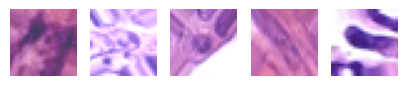

In [28]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',
    zoom_range=0.3,
    channel_shift_range=50,
    rotation_range=359,
    brightness_range=[1.0,1.2],
)

train_generator_aug = train_datagen_aug.flow_from_dataframe(
    dataframe=resampled_train_data,
    directory='./Image_classification_data/patch_images/',
    x_col="ImageName",
    y_col="cellTypeName",
    target_size=(27, 27),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

IMAGE_NO = 5
fig, axs = plt.subplots(1, IMAGE_NO, figsize=(IMAGE_NO, 3))
for i in range(IMAGE_NO):
    axs[i].axis('off')
    img, label = train_generator_aug.next()
    axs[i].imshow(img[0])
plt.show()


### Model Architecture

In [63]:
REG_RATE = 0.0001

model_23 = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(27, 27, 3)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    MaxPooling2D(pool_size=(3,3)),

    Flatten(),
    Dense(512, activation="relu", kernel_regularizer=L2(REG_RATE)),
    Dropout(0.1),
    Dense(512, activation="relu", kernel_regularizer=L2(REG_RATE)),
    Dropout(0.1),

    Dense(4, activation='softmax'),
])

model_23.compile("sgd", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['categorical_accuracy'])

tensorboard_callback_23 = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

model_23.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 27, 27, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 9, 9, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 3, 128)        

In [64]:
hist_23 = model_23.fit(
    train_generator_aug,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback_23, early_stopping]
)

Epoch 1/100


2023-05-17 15:04:45.044551: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6250/6250 [==============================] - ETA: 0s - loss: 1.1911 - categorical_accuracy: 0.5072

2023-05-17 15:06:13.503736: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6250/6250 [==============================] - 89s 14ms/step - loss: 1.1911 - categorical_accuracy: 0.5072 - val_loss: 0.8485 - val_categorical_accuracy: 0.7181
Epoch 2/100
6250/6250 [==============================] - 90s 14ms/step - loss: 0.9479 - categorical_accuracy: 0.6403 - val_loss: 0.7442 - val_categorical_accuracy: 0.7602
Epoch 3/100
6250/6250 [==============================] - 92s 15ms/step - loss: 0.8703 - categorical_accuracy: 0.6821 - val_loss: 0.6951 - val_categorical_accuracy: 0.7792
Epoch 4/100
6250/6250 [==============================] - 93s 15ms/step - loss: 0.8169 - categorical_accuracy: 0.7082 - val_loss: 0.6648 - val_categorical_accuracy: 0.7826
Epoch 5/100
6250/6250 [==============================] - 95s 15ms/step - loss: 0.7782 - categorical_accuracy: 0.7263 - val_loss: 0.7387 - val_categorical_accuracy: 0.7480
Epoch 6/100
6250/6250 [==============================] - 89s 14ms/step - loss: 0.7450 - categorical_accuracy: 0.7408 - val_loss: 0.7580 - val_categorical_acc

###  Training and Valuation result

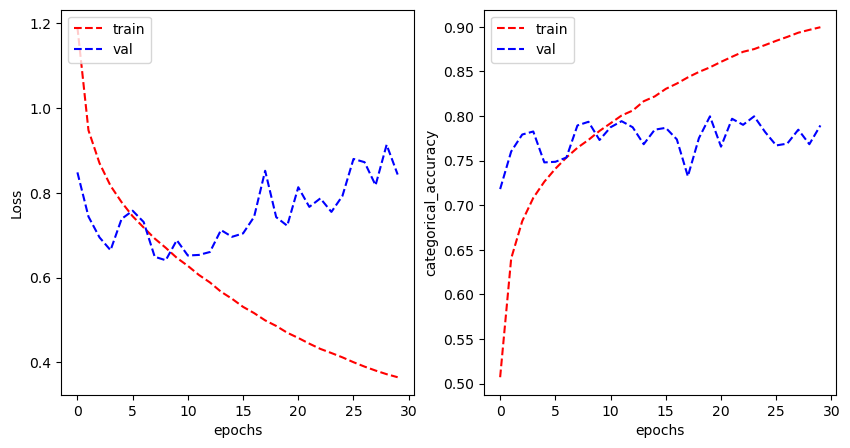

In [65]:
plot_learning_curve(hist_23.history['loss'],
                    hist_23.history['val_loss'],
                    hist_23.history['categorical_accuracy'],
                    hist_23.history['val_categorical_accuracy'],
                    metric_name='categorical_accuracy')

### Test & Evaluate

 178/1485 [==>...........................] - ETA: 1s - loss: 0.5621 - categorical_accuracy: 0.8202

2023-05-17 14:46:00.674352: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 203/1485 [===>..........................] - ETA: 0s

2023-05-17 14:46:01.897066: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1485/1485 [==============================] - 1s 719us/step
loss : 0.601179301738739

categorical_accuracy : 0.8121212124824524



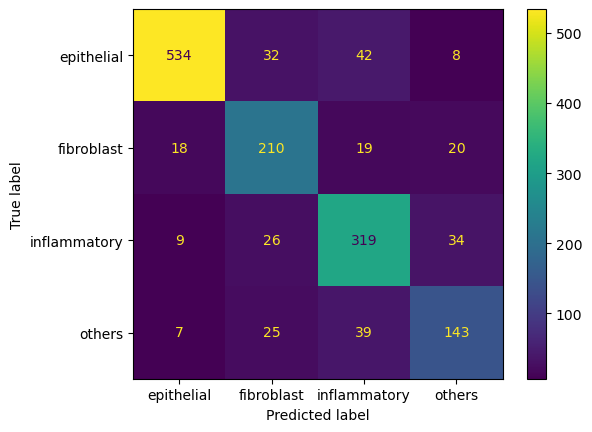

True Positives Count:                                       1206
Total Cell Counts:                                          1485
F1 Score (Weighted):                                        0.8139503167895842


([0.601179301738739, 0.8121212124824524],
 array([[5.0105453e-01, 3.8881734e-01, 2.4222458e-02, 8.5905619e-02],
        [9.8651844e-01, 1.1252666e-02, 4.3605280e-04, 1.7928163e-03],
        [8.8025909e-03, 2.3475823e-01, 6.2882078e-01, 1.2761846e-01],
        ...,
        [3.5821971e-02, 4.6506199e-01, 1.9978392e-01, 2.9933211e-01],
        [4.7715672e-04, 1.2048222e-02, 3.2339984e-01, 6.6407478e-01],
        [2.1530944e-04, 4.0741864e-01, 9.9059073e-03, 5.8246017e-01]],
       dtype=float32))

In [62]:
test_and_evaluate(model_23, test_generator)

# Cancerous Classification - Binary
## Baseline Model Binary

In [33]:
df_all.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Source
0,22405,1,22405.png,fibroblast,0.0,0,Main
1,22406,1,22406.png,fibroblast,0.0,0,Main
2,22407,1,22407.png,fibroblast,0.0,0,Main
3,22408,1,22408.png,fibroblast,0.0,0,Main
4,22409,1,22409.png,fibroblast,0.0,0,Main


In [34]:
df_all['isCancerous_str'] = df_all['isCancerous'].apply(lambda x: 'No' if x == 0 else 'Yes' )
df_all['ImageName'] = df_all['ImageName'].astype('str')
df_all['isCancerous_str'] = df_all['isCancerous_str'].astype('str')

In [35]:
train_data_binary, test_data_binary = train_test_split(df_all, test_size=0.15, random_state=7)
train_data_binary, val_data_binary = train_test_split(train_data_binary, test_size=0.175, random_state=7)

In [36]:
train_data_binary.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Source,isCancerous_str
1215,4956,8,4956.png,epithelial,2.0,1,Main,Yes
3434,2369,77,2369.png,NaN,NaN,0,Extra,No
7615,808,48,808.png,epithelial,2.0,1,Main,Yes
8041,3379,51,3379.png,others,3.0,0,Main,No
6080,20548,37,20548.png,fibroblast,0.0,0,Main,No


In [37]:
val_data_binary.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Source,isCancerous_str
1076,12843,67,12843.png,NaN,NaN,0,Extra,No
4993,2878,80,2878.png,NaN,NaN,1,Extra,Yes
9614,21538,92,21538.png,NaN,NaN,0,Extra,No
5041,16881,29,16881.png,inflammatory,1.0,0,Main,No
2409,3126,14,3126.png,epithelial,2.0,1,Main,Yes


In [38]:
train_datagen_binary = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen_binary = ImageDataGenerator(rescale=1./255, data_format='channels_last')

BATCH_SIZE = 32

train_gen_binary = train_datagen_binary.flow_from_dataframe(
        dataframe=train_data_binary,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous_str",
        target_size=(27, 27),
        batch_size=BATCH_SIZE,
        class_mode='binary')

val_gen_binary = val_datagen_binary.flow_from_dataframe(
        dataframe=val_data_binary,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous_str",
        target_size=(27, 27),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
)

Found 14221 validated image filenames belonging to 2 classes.
Found 3017 validated image filenames belonging to 2 classes.


In [39]:
cancerous_count = np.bincount(train_gen_binary.classes)
total = np.sum(cancerous_count)
binary_class_weight = {}
print(type(cancerous_count))
print(train_gen_binary.class_indices)
for i, each_type_count in enumerate(cancerous_count):
    binary_class_weight[i] = 1/each_type_count * total/len(cancerous_count)

print(f'Binary Class Weight: {binary_class_weight}')

<class 'numpy.ndarray'>
{'No': 0, 'Yes': 1}
Binary Class Weight: {0: 0.7609696061643835, 1: 1.4579659626819768}


### Model Architecture

In [40]:
early_stop_binary = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [41]:
REG_RATE_BINARY = 0.0001

model_binary_1 = Sequential([

    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(27, 27, 3)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3)),
    
    Flatten(),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),

    Dense(1, activation='sigmoid'),
])

model_binary_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 128)        

In [42]:
model_binary_1.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=['binary_accuracy'])

tb_binary_cb= tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

hist_binary_1 = model_binary_1.fit(
    train_gen_binary,
    epochs=100,
    validation_data=val_gen_binary,
    callbacks=[tb_binary_cb, early_stop_binary],
    class_weight=binary_class_weight
)

Epoch 1/100


2023-05-17 11:49:51.592704: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


443/445 [============================>.] - ETA: 0s - loss: 0.4391 - binary_accuracy: 0.7884

2023-05-17 11:49:57.779927: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


445/445 [==============================] - 7s 15ms/step - loss: 0.4389 - binary_accuracy: 0.7887 - val_loss: 0.3156 - val_binary_accuracy: 0.8681
Epoch 2/100
445/445 [==============================] - 7s 15ms/step - loss: 0.3466 - binary_accuracy: 0.8528 - val_loss: 0.3577 - val_binary_accuracy: 0.8462
Epoch 3/100
445/445 [==============================] - 7s 15ms/step - loss: 0.3023 - binary_accuracy: 0.8765 - val_loss: 0.2847 - val_binary_accuracy: 0.8770
Epoch 4/100
445/445 [==============================] - 7s 15ms/step - loss: 0.3063 - binary_accuracy: 0.8782 - val_loss: 0.3477 - val_binary_accuracy: 0.8412
Epoch 5/100
445/445 [==============================] - 7s 16ms/step - loss: 0.2863 - binary_accuracy: 0.8831 - val_loss: 0.2907 - val_binary_accuracy: 0.8750
Epoch 6/100
445/445 [==============================] - 7s 15ms/step - loss: 0.2700 - binary_accuracy: 0.8903 - val_loss: 0.3732 - val_binary_accuracy: 0.8459
Epoch 7/100
445/445 [==============================] - 7s 15ms/s

### Training and Valuation result

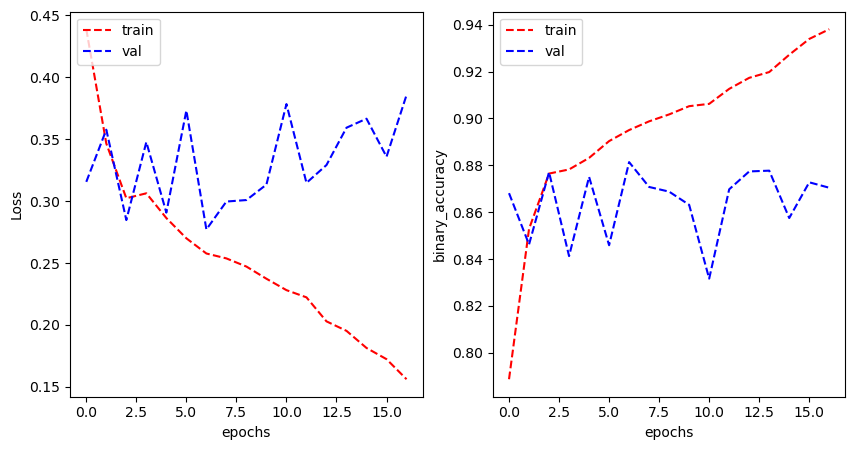

In [43]:
plot_learning_curve(
    hist_binary_1.history['loss'],
    hist_binary_1.history['val_loss'],
    hist_binary_1.history['binary_accuracy'],
    hist_binary_1.history['val_binary_accuracy'],
    metric_name='binary_accuracy'
)

### Test & Evaluate

In [44]:
test_binary_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
TEST_BATCH_SIZE = 1
test_binary_gen = test_binary_datagen.flow_from_dataframe(
        dataframe=test_data_binary,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous_str",
        target_size=(27, 27),
        batch_size=TEST_BATCH_SIZE,
        class_mode='binary',
        shuffle=False
)

Found 3042 validated image filenames belonging to 2 classes.


 145/3042 [>.............................] - ETA: 3s - loss: 0.3376 - binary_accuracy: 0.8621

2023-05-17 11:51:45.084312: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 182/3042 [>.............................] - ETA: 2s

2023-05-17 11:51:47.892865: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3042/3042 [==============================] - 2s 784us/step
loss : 0.2685542404651642

binary_accuracy : 0.8971071839332581



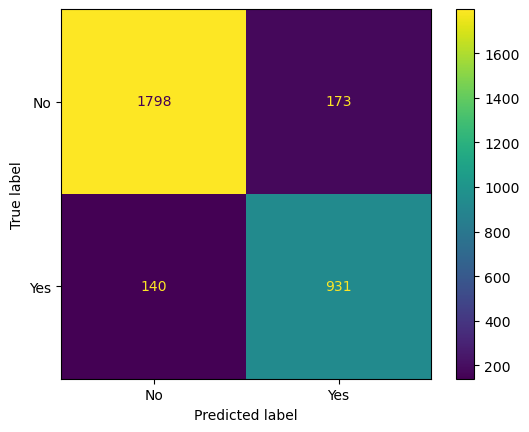

Non Cancerous Cell Detected (True Negatives):               1798
Non Cancerous Cell Incorrectly Detected (False Positives):  173
Cancerous Cell Missed (False Negatives):                    140
Cancerous Cell Detected (True Positives):                   931
Total Cell Counts:                                          3042
F1 Score (Weighted):                                        0.897453419089635


In [45]:
eva, test_pred_binary_base = test_and_evaluate(model_binary_1, test_binary_gen, True)

## Oversampling Model - Binary

In [46]:
train_data_binary[train_data_binary['isCancerous']==0]['isCancerous_str'].value_counts()

No    9344
Name: isCancerous_str, dtype: int64

In [47]:
largest_no = 50000

t_features = train_data_binary[train_data_binary['isCancerous']==1]['ImageName'].to_numpy()
t_labels = train_data_binary[train_data_binary['isCancerous']==1]['isCancerous_str'].to_numpy()
t_ids = np.arange(len(t_features))
t_choices = np.random.choice(t_ids, largest_no)
t_pick_feature = t_features[t_choices]
t_choices_labels = np.random.choice(t_labels, largest_no)


f_features = train_data_binary[train_data_binary['isCancerous']==0]['ImageName'].to_numpy()
f_labels = train_data_binary[train_data_binary['isCancerous']==0]['isCancerous_str'].to_numpy()
f_ids = np.arange(len(f_features))
f_choices = np.random.choice(f_ids, largest_no)
f_pick_feature = f_features[f_choices]
f_choices_labels = np.random.choice(f_labels, largest_no)


resampled_features = np.concatenate([t_pick_feature, f_pick_feature], axis=0)
resampled_labels = np.concatenate([t_choices_labels, f_choices_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features_tr = resampled_features.transpose()
resampled_labels_tr = resampled_labels.transpose()

resampled_train_data_binary = pd.DataFrame({'ImageName': resampled_features_tr, 'isCancerous': resampled_labels_tr})
resampled_train_data_binary.head()

,ImageName,isCancerous
0,19604.png,No
1,8328.png,Yes
2,1356.png,Yes
3,8968.png,Yes
4,11047.png,No


### Model Architecture

Found 100000 validated image filenames belonging to 2 classes.


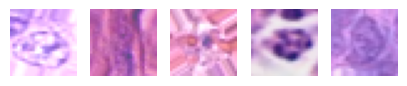

In [48]:
train_datagen_aug_binary = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',
    zoom_range=0.3,
    channel_shift_range=50,
    rotation_range=359,
    brightness_range=[1.0,1.2],
)

train_generator_aug_binary = train_datagen_aug_binary.flow_from_dataframe(
    dataframe=resampled_train_data_binary,
    directory='./Image_classification_data/patch_images/',
    x_col="ImageName",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

IMAGE_NO = 5
fig, axs = plt.subplots(1, IMAGE_NO, figsize=(IMAGE_NO, 3))
for i in range(IMAGE_NO):
    axs[i].axis('off')
    img, label = train_generator_aug.next()
    axs[i].imshow(img[0])
plt.show()


In [49]:
REG_RATE = 0.001

model_binary_2 = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(27, 27, 3)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=L2(REG_RATE)),
    MaxPooling2D(pool_size=(3,3)),

    Flatten(),
    Dense(512, activation="relu", kernel_regularizer=L2(REG_RATE)),
    Dropout(0.2),
    Dense(512, activation="relu", kernel_regularizer=L2(REG_RATE)),
    Dropout(0.2),

    Dense(1, activation='sigmoid'),
])

model_binary_2.compile("sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['binary_accuracy'])

tb_callback_binary_2 = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

model_binary_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 27, 27, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 128)        

In [50]:
hist_binary_2 = model_binary_2.fit(
    train_generator_aug_binary,
    epochs=100,
    validation_data=val_gen_binary,
    callbacks=[tb_callback_binary_2, early_stop_binary]
)

Epoch 1/100


2023-05-17 11:51:51.574647: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3124/3125 [============================>.] - ETA: 0s - loss: 1.5938 - binary_accuracy: 0.6524

2023-05-17 11:52:34.290817: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 43s 14ms/step - loss: 1.5937 - binary_accuracy: 0.6525 - val_loss: 1.3005 - val_binary_accuracy: 0.8422
Epoch 2/100
3125/3125 [==============================] - 45s 15ms/step - loss: 1.2937 - binary_accuracy: 0.8083 - val_loss: 1.1504 - val_binary_accuracy: 0.8578
Epoch 3/100
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1509 - binary_accuracy: 0.8320 - val_loss: 1.0362 - val_binary_accuracy: 0.8668
Epoch 4/100
3125/3125 [==============================] - 47s 15ms/step - loss: 1.0390 - binary_accuracy: 0.8454 - val_loss: 0.9395 - val_binary_accuracy: 0.8740
Epoch 5/100
3125/3125 [==============================] - 48s 15ms/step - loss: 0.9520 - binary_accuracy: 0.8506 - val_loss: 0.8737 - val_binary_accuracy: 0.8747
Epoch 6/100
3125/3125 [==============================] - 47s 15ms/step - loss: 0.8766 - binary_accuracy: 0.8526 - val_loss: 0.7949 - val_binary_accuracy: 0.8734
Epoch 7/100
3125/3125 [=======================

### Training and Valuation result

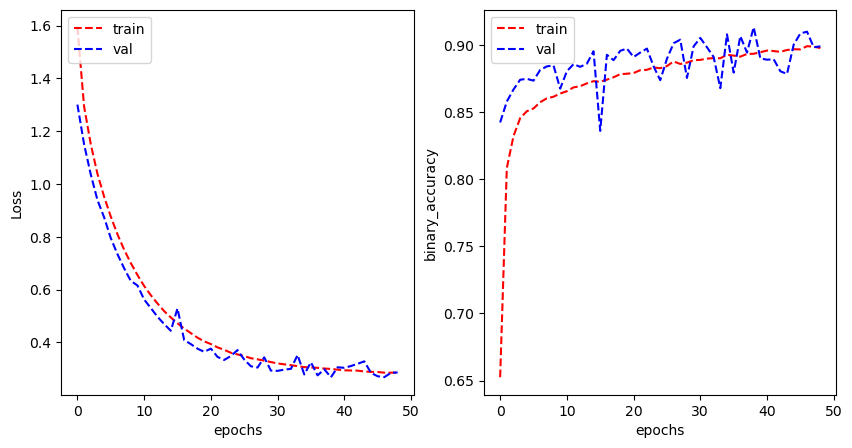

In [51]:
plot_learning_curve(
    hist_binary_2.history['loss'],
    hist_binary_2.history['val_loss'],
    hist_binary_2.history['binary_accuracy'],
    hist_binary_2.history['val_binary_accuracy'],
    metric_name='binary_accuracy'
)

### Test & Evaluate

 149/3042 [>.............................] - ETA: 2s - loss: 0.3449 - binary_accuracy: 0.8859

2023-05-17 13:01:42.401361: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 115/3042 [>.............................] - ETA: 2s

2023-05-17 13:01:45.289148: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3042/3042 [==============================] - 3s 863us/step
loss : 0.27222928404808044

binary_accuracy : 0.9142012000083923



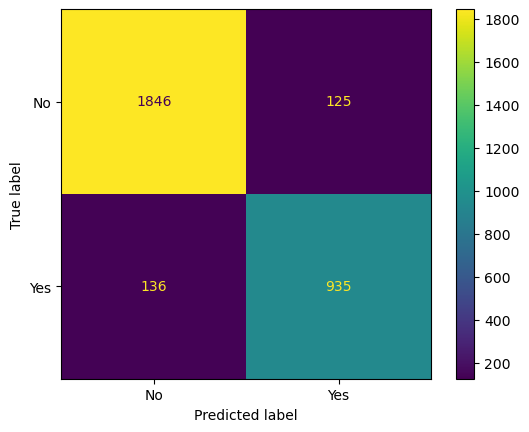

Non Cancerous Cell Detected (True Negatives):               1846
Non Cancerous Cell Incorrectly Detected (False Positives):  125
Cancerous Cell Missed (False Negatives):                    136
Cancerous Cell Detected (True Positives):                   935
Total Cell Counts:                                          3042
F1 Score (Weighted):                                        0.9140991171967641


In [52]:
eva, test_pred_binary_oversample = test_and_evaluate(model_binary_2, test_binary_gen, True)